<a href="https://colab.research.google.com/github/vanstevanzaky/PEMB_MESIN_LEARING_TI_25-26/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JS05 - KLASTERISASI HIERARKI**

## **Praktikum 1**

**Pengantar Praktikum**

Pada praktikum ini kita akan mempelajari algoritma HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) sebagai salah satu metode clustering berbasis densitas yang lebih robust dibandingkan DBSCAN. Melalui pendekatan hierarki, HDBSCAN mampu mengatasi keterbatasan parameter eps yang sensitif pada DBSCAN serta dapat menyesuaikan diri dengan data yang memiliki kepadatan berbeda. Praktikum ini akan difokuskan pada eksplorasi hasil clustering menggunakan dataset sintetis serta pengaruh hyperparameter penting seperti min_cluster_size, min_samples, dan cut_distance, sehingga nantinya dapat memahami bagaimana HDBSCAN bekerja dalam memisahkan cluster, mengidentifikasi noise, dan beradaptasi dengan struktur data yang kompleks.

### Langkah 1: Persiapan Lingkungan

In [3]:
# Instalasi pustaka hdbscan (tidak tersedia default di sklearn)
!pip install hdbscan

# Import modul
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


Kode ini melakukan dua hal utama:

1.  **Instalasi pustaka `hdbscan`**: Pustaka ini tidak termasuk dalam instalasi standar `sklearn`, jadi baris `!pip install hdbscan` menginstalnya agar bisa digunakan.
2.  **Import modul yang diperlukan**: Baris-baris berikutnya mengimpor modul-modul yang dibutuhkan untuk analisis clustering, yaitu `matplotlib.pyplot` untuk visualisasi, `numpy` untuk operasi numerik, `DBSCAN` dari `sklearn.cluster` (meskipun fokus pada HDBSCAN, DBSCAN juga diimpor), dan `hdbscan` itu sendiri.

### Langkah 2: Definisi Fungsi Visualisasi

In [1]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

Fungsi `plot` ini digunakan untuk memvisualisasikan hasil clustering. Fungsi ini akan menggambar titik-titik data pada scatter plot, dengan warna dan ukuran marker yang berbeda-beda. Secara spesifik:

-   **Warna**: Menunjukkan cluster tempat setiap titik data berada. Titik noise (cluster -1) diberi warna hitam.
-   **Ukuran marker**: Disesuaikan dengan probabilitas keanggotaan cluster (`probabilities`), di mana ukuran yang lebih besar menunjukkan probabilitas yang lebih tinggi.
-   **Judul plot**: Menyertakan jumlah cluster yang terdeteksi dan parameter clustering yang digunakan (jika ada).

### Langkah 3: Membuat Dataset Sintesis

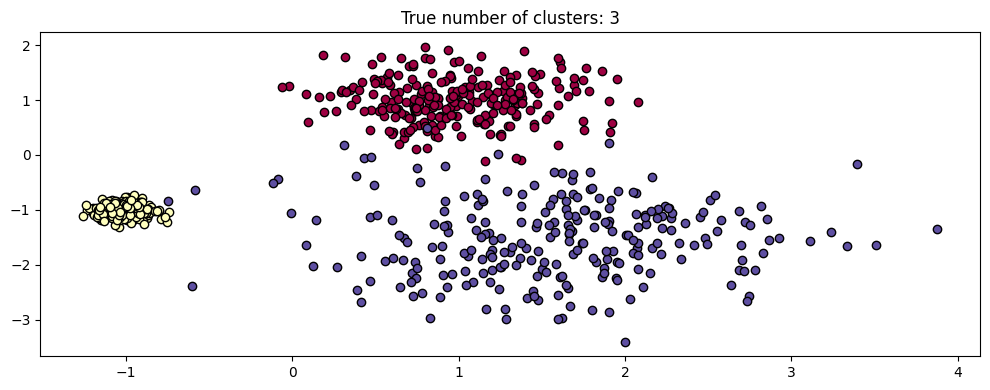

In [4]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

plot(X, labels=labels_true, ground_truth=True)

Kode ini membuat dataset sintetis menggunakan fungsi `make_blobs` dari `sklearn.datasets`. Dataset ini terdiri dari 750 titik data yang dikelompokkan menjadi 3 cluster dengan pusat (`centers`) dan standar deviasi (`cluster_std`) yang berbeda. `random_state=0` digunakan agar hasil pembuatan dataset konsisten setiap kali kode dijalankan.

Output dari kode ini adalah scatter plot yang memvisualisasikan dataset yang baru saja dibuat. Setiap titik data diwarnai berdasarkan cluster asalnya (ground truth), menunjukkan sebaran awal data sebelum dilakukan proses clustering. Judul plot menunjukkan jumlah cluster sebenarnya dalam dataset ini, yaitu 3.

### Langkah 4: Uji Scale Invariance pada DBSCAN

#### Jalankan DBSCAN dengan eps=0.3 pada dataset yang di-scale.

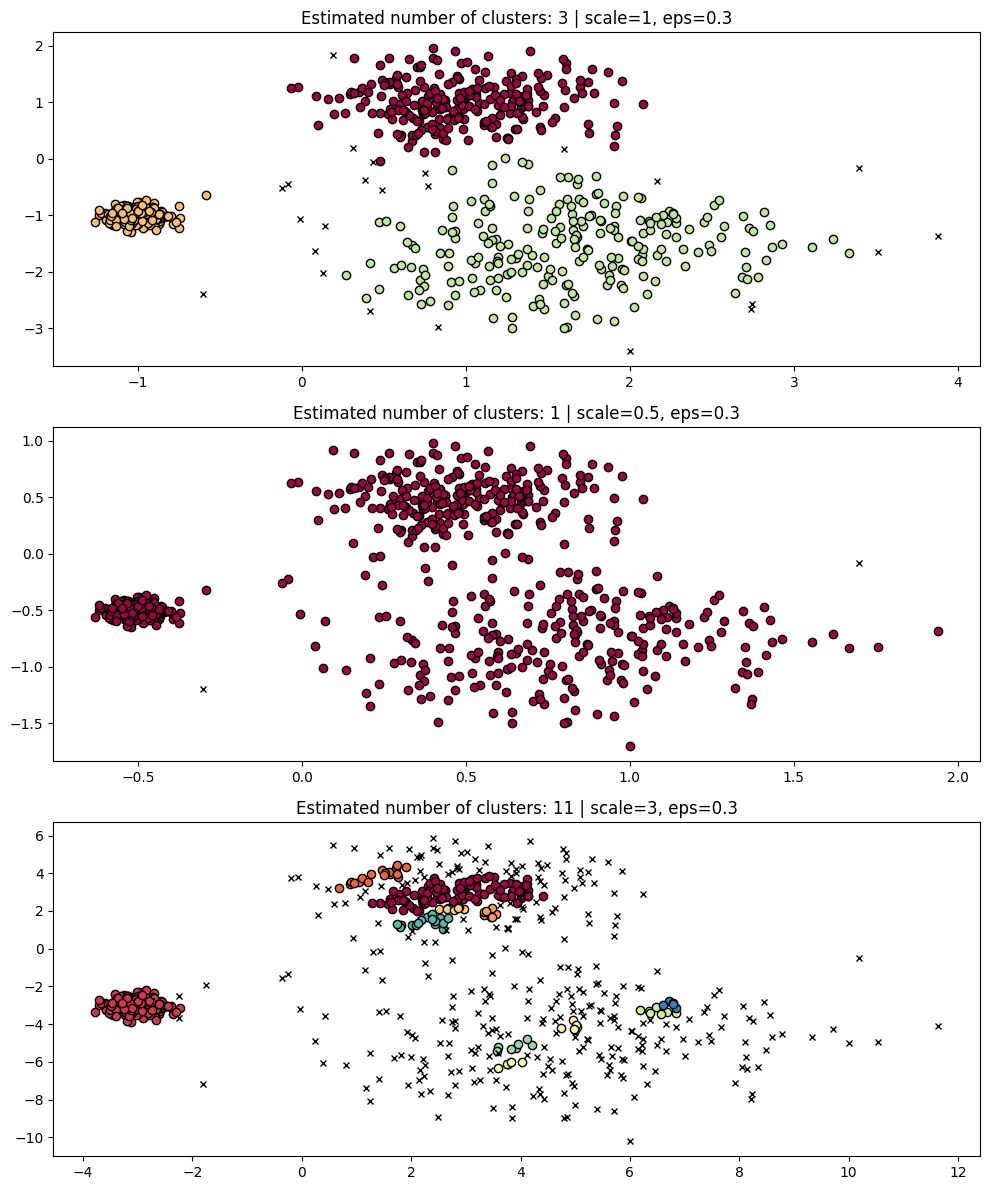

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

Kode ini mendemonstrasikan bagaimana algoritma clustering DBSCAN (Density-Based Spatial Clustering of Applications with Noise) dipengaruhi oleh penskalaan data.

Loop ini menjalankan DBSCAN tiga kali pada dataset yang sama (`X`), tetapi dengan data yang diskalakan (`X * scale`) menggunakan faktor skala yang berbeda (1, 0.5, dan 3). Parameter `eps` untuk DBSCAN diatur tetap pada 0.3 di setiap iterasi.

Outputnya adalah tiga scatter plot, masing-masing menampilkan hasil clustering DBSCAN pada dataset yang diskalakan berbeda:

1.  **Skala 1 (data asli)**: DBSCAN berhasil menemukan beberapa cluster, tetapi juga mengklasifikasikan banyak titik sebagai noise (-1, hitam) karena sensitivitasnya terhadap kepadatan.
2.  **Skala 0.5 (data diperkecil)**: Dengan data yang diperkecil, jarak antar titik menjadi lebih kecil. DBSCAN dengan `eps` yang sama (0.3) sekarang menganggap lebih banyak titik berdekatan, menghasilkan lebih sedikit noise dan cluster yang lebih besar.
3.  **Skala 3 (data diperbesar)**: Dengan data yang diperbesar, jarak antar titik menjadi lebih besar. DBSCAN dengan `eps` yang sama (0.3) sekarang menganggap lebih sedikit titik berdekatan, menghasilkan lebih banyak noise dan cluster yang lebih kecil atau bahkan tidak menemukan cluster sama sekali.

Analisis ini menunjukkan bahwa DBSCAN sangat sensitif terhadap parameter `eps` dan skala data. Perubahan kecil pada skala data dapat secara signifikan mengubah hasil clustering, yang merupakan salah satu motivasi untuk menggunakan algoritma seperti HDBSCAN yang kurang sensitif terhadap parameter tunggal seperti `eps`.

#### Perbaiki dengan mengubah eps sesuai skala:

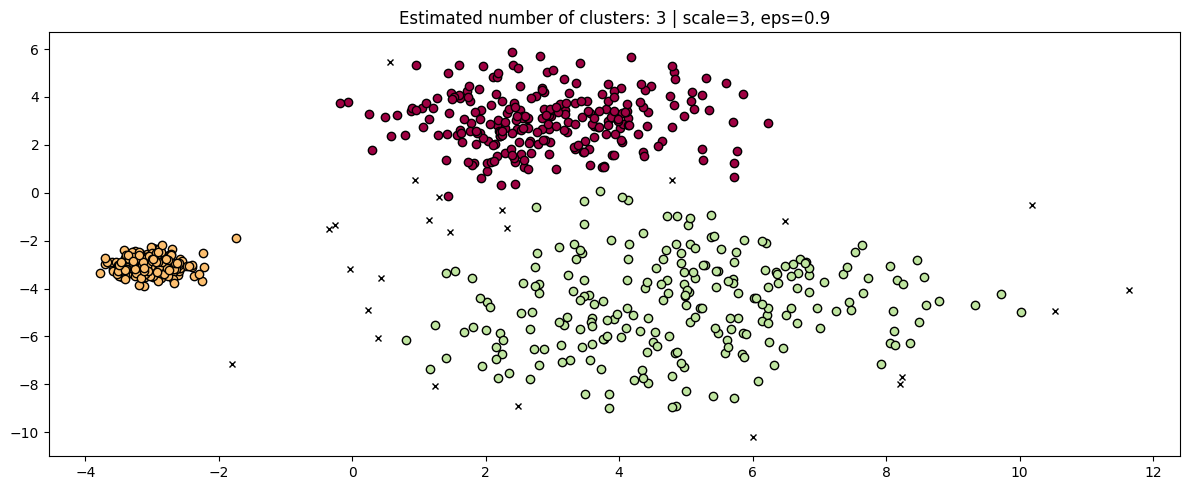

In [6]:
fig, axis = plt.subplots(1, 1, figsize=(12, 5))
dbs = DBSCAN(eps=0.9).fit(3 * X)
plot(3 * X, dbs.labels_, parameters={"scale": 3, "eps": 0.9}, ax=axis)

Kode ini mencoba "memperbaiki" hasil clustering DBSCAN pada data yang diperbesar (skala 3) dengan mengubah parameter `eps` dari 0.3 menjadi 0.9.

Outputnya adalah satu scatter plot yang menunjukkan hasil clustering DBSCAN pada dataset yang diskalakan 3, dengan `eps` yang diubah menjadi 0.9. Terlihat bahwa dengan menyesuaikan nilai `eps` yang lebih besar sesuai dengan penskalaan data, DBSCAN sekarang dapat menemukan cluster lagi, meskipun hasilnya mungkin masih berbeda dengan ground truth atau hasil pada skala data asli.

Ini lebih lanjut menunjukkan bahwa DBSCAN memerlukan tuning parameter `eps` yang cermat, terutama ketika berhadapan dengan data yang memiliki kepadatan atau skala yang bervariasi. Ini menjadi titik transisi untuk memperkenalkan HDBSCAN yang tidak memerlukan parameter `eps` eksplisit dan lebih adaptif terhadap kepadatan data yang berbeda.

Selanjutnya, kita bisa melanjutkan ke langkah berikutnya untuk mengeksplorasi HDBSCAN.

### Langkah 5: Bandingkan dengan HDBSCAN (lebih robust)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

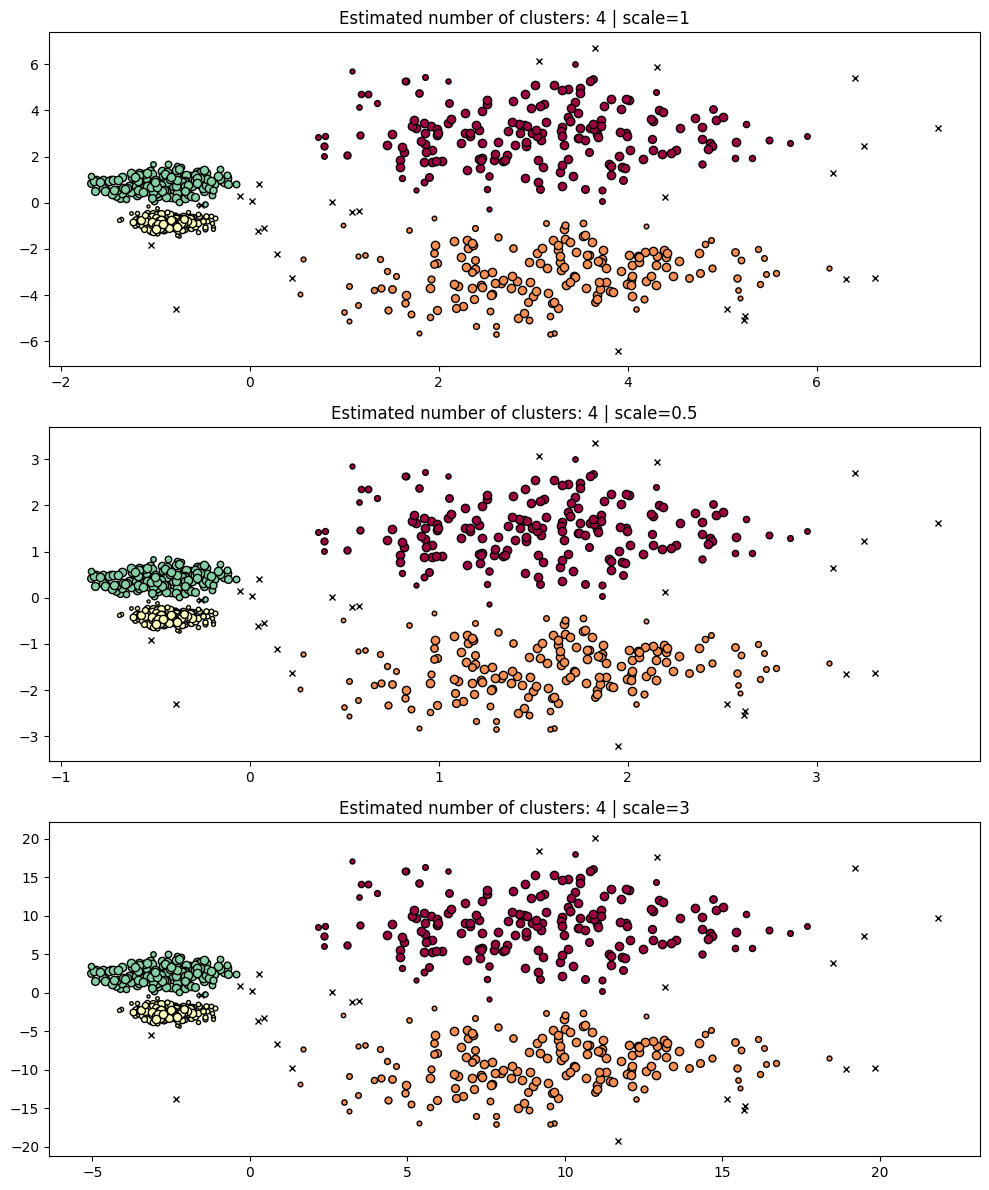

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
hdb = hdbscan.HDBSCAN()
for idx, scale in enumerate([1, 0.5, 3]):
    hdb.fit(X * scale)
    plot(X * scale, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"scale": scale})

Kode ini mendemonstrasikan kemampuan HDBSCAN dalam menangani data yang diskalakan berbeda, yang merupakan salah satu keunggulan utamanya dibandingkan DBSCAN.

Loop ini menjalankan HDBSCAN tiga kali pada dataset yang sama (`X`), tetapi dengan data yang diskalakan (`X * scale`) menggunakan faktor skala yang berbeda (1, 0.5, dan 3). HDBSCAN digunakan dengan parameter default (`hdbscan.HDBSCAN()`).

Outputnya adalah tiga scatter plot, masing-masing menampilkan hasil clustering HDBSCAN pada dataset yang diskalakan berbeda:

1.  **Skala 1 (data asli)**: HDBSCAN berhasil mendeteksi cluster pada data asli.
2.  **Skala 0.5 (data diperkecil)**: Meskipun data diperkecil, HDBSCAN masih mampu mendeteksi cluster yang serupa dengan data asli. Ini menunjukkan bahwa HDBSCAN tidak terlalu sensitif terhadap perubahan skala data.
3.  **Skala 3 (data diperbesar)**: Demikian pula, pada data yang diperbesar, HDBSCAN tetap dapat mengidentifikasi cluster.

Analisis ini menunjukkan bahwa HDBSCAN lebih robust terhadap penskalaan data dibandingkan DBSCAN. Ini karena HDBSCAN tidak bergantung pada parameter jarak tunggal seperti `eps`, melainkan membangun hierarki kepadatan yang kurang terpengaruh oleh perubahan skala global data.

### Langkah 6: Multi-Scale Clustering

#### Buat dataset baru dengan kepadatan berbeda.

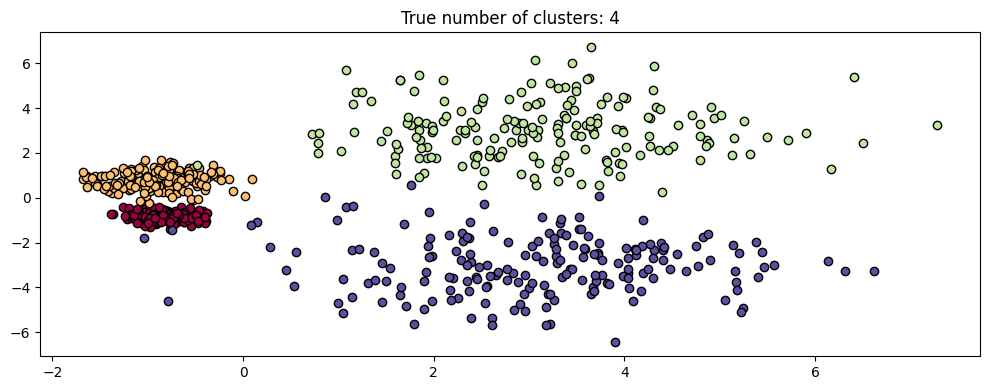

In [7]:
centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

Kode ini membuat dataset sintetis baru menggunakan fungsi `make_blobs` dari `sklearn.datasets`. Dataset ini dirancang untuk memiliki cluster dengan kepadatan yang berbeda.

Outputnya adalah scatter plot yang memvisualisasikan dataset baru ini. Anda dapat melihat ada empat kelompok titik data (sesuai dengan `centers` yang ditentukan), tetapi dua kelompok di kiri tampak lebih padat dibandingkan dua kelompok di kanan yang lebih menyebar. Plot ini menampilkan ground truth atau label asli dari setiap titik data, menunjukkan sebaran data sebelum dilakukan proses clustering dengan HDBSCAN yang dapat menangani kepadatan yang bervariasi. Dataset ini akan digunakan untuk mendemonstrasikan kemampuan HDBSCAN dalam skenario multi-skala atau multi-densitas.

#### Bandingkan DBSCAN dengan eps berbeda:

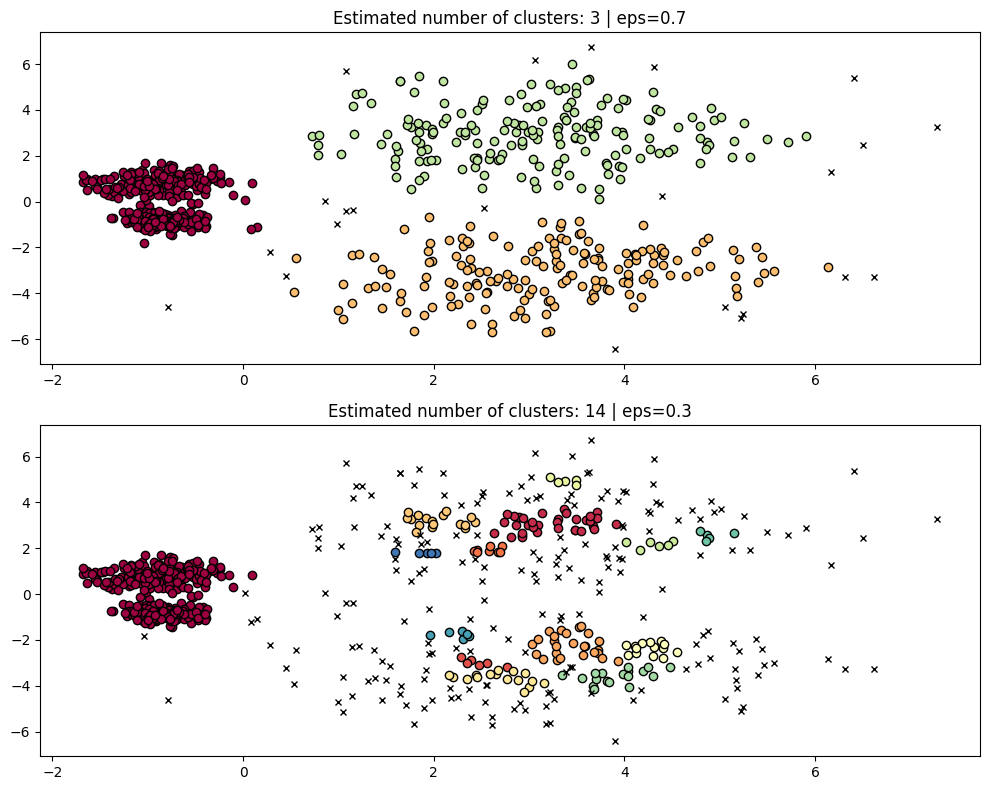

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
params = {"eps": 0.7}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[0])

params = {"eps": 0.3}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[1])

Kode ini membandingkan hasil clustering menggunakan DBSCAN pada dataset dengan kepadatan yang berbeda, dengan menggunakan dua nilai `eps` yang berbeda (0.7 dan 0.3).

Outputnya adalah dua scatter plot yang menunjukkan hasil clustering DBSCAN:

1.  **eps=0.7**: Dengan nilai `eps` yang relatif besar, DBSCAN cenderung menggabungkan cluster yang berdekatan dan kurang efektif dalam memisahkan cluster yang lebih padat dari yang lebih menyebar. Beberapa titik noise juga terklasifikasi sebagai bagian dari cluster.
2.  **eps=0.3**: Dengan nilai `eps` yang lebih kecil, DBSCAN lebih baik dalam mengidentifikasi cluster yang padat, tetapi cluster yang lebih menyebar sebagian besar diklasifikasikan sebagai noise (-1, hitam) karena jarak antar titiknya melebihi `eps` yang kecil.

Analisis ini menyoroti kesulitan DBSCAN dalam menangani dataset dengan kepadatan yang bervariasi secara efektif dengan satu nilai `eps`. Ini adalah motivasi utama untuk menggunakan HDBSCAN, yang dapat menyesuaikan diri dengan kepadatan lokal data.

Langkah selanjutnya adalah menerapkan HDBSCAN pada dataset ini untuk melihat bagaimana algoritma tersebut menangani masalah multi-densitas ini.

#### Jalankan HDBSCAN:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


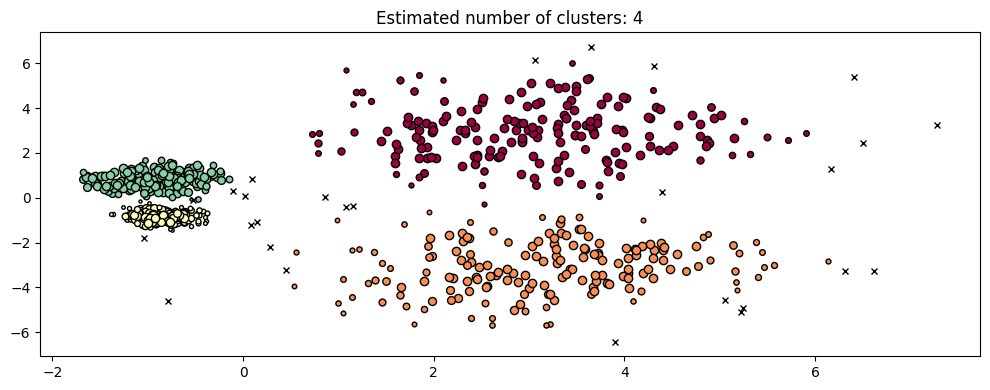

In [16]:
hdb = hdbscan.HDBSCAN().fit(X)
plot(X, hdb.labels_, hdb.probabilities_)

## **Praktikum 2**

Setelah pada praktikum pertama kita membandingkan HDBSCAN dengan DBSCAN dan melihat keunggulannya, pada praktikum kedua ini kita akan fokus hanya pada HDBSCAN. Tujuannya adalah memahami bagaimana hasil clustering dapat dipengaruhi oleh perubahan hyperparameter. Dengan mencoba berbagai nilai untuk min_cluster_size, min_samples, dan cut_distance, kita akan melihat bagaimana HDBSCAN mengatur jumlah cluster, memisahkan noise, dan menyesuaikan diri terhadap struktur data yang berbeda.

### Langkah 7: Eksperimen Hyperparameter min_cluster_size

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

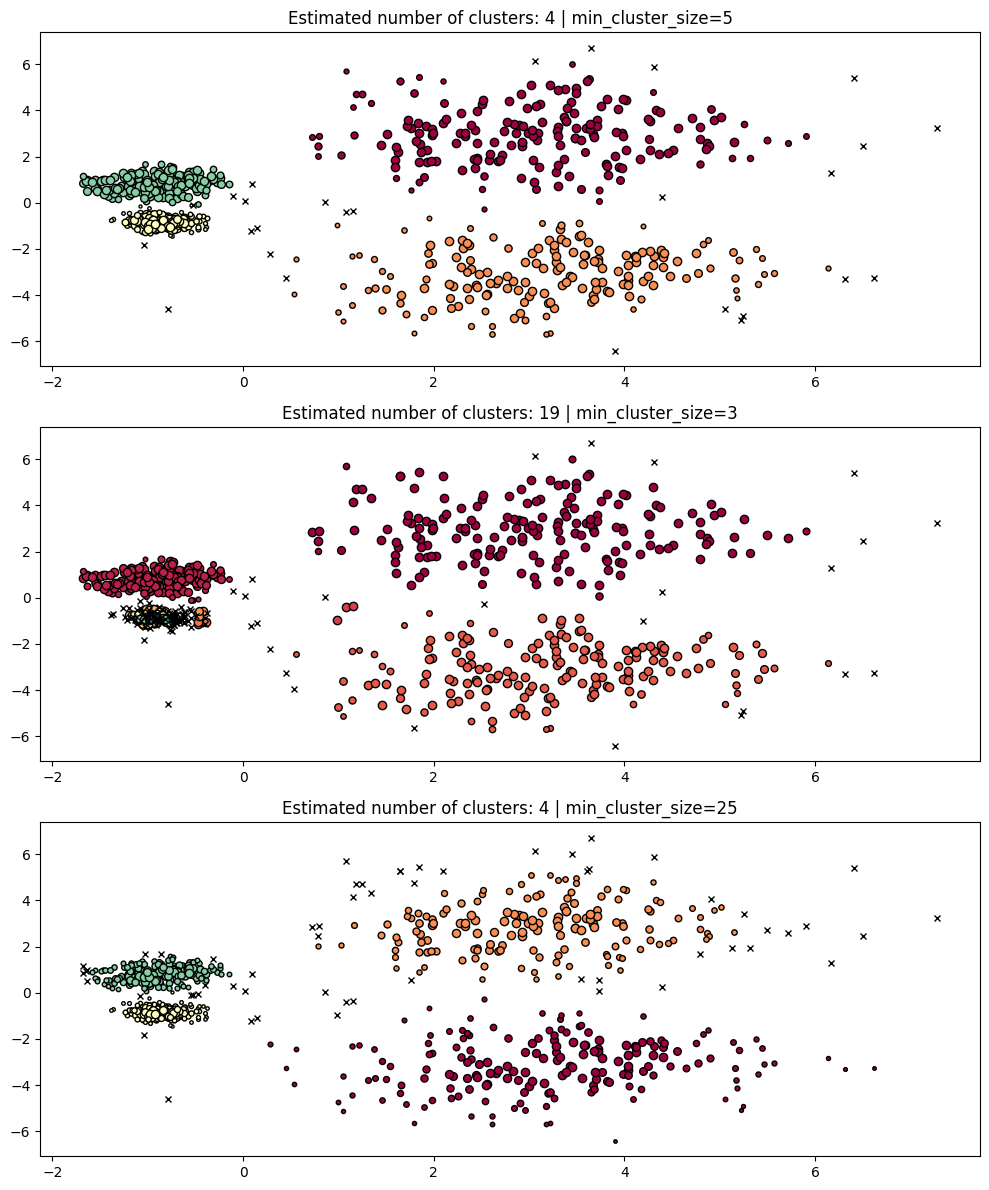

In [17]:
PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

Kode ini melakukan eksperimen dengan mengubah hyperparameter `min_cluster_size` pada algoritma HDBSCAN untuk melihat pengaruhnya terhadap hasil clustering.

Loop ini menjalankan HDBSCAN tiga kali pada dataset yang sama (`X`), dengan menggunakan nilai `min_cluster_size` yang berbeda (5, 3, dan 25). Parameter lain HDBSCAN menggunakan nilai default.

Outputnya adalah tiga scatter plot, masing-masing menampilkan hasil clustering HDBSCAN dengan nilai `min_cluster_size` yang berbeda:

1.  **min_cluster_size=5**: Dengan nilai ini, HDBSCAN akan menganggap sekelompok titik sebagai cluster jika minimal ada 5 titik dalam kelompok tersebut. Ini menghasilkan jumlah cluster tertentu dan mengklasifikasikan titik-titik di luar cluster sebagai noise.
2.  **min_cluster_size=3**: Mengurangi `min_cluster_size` menjadi 3 membuat HDBSCAN lebih sensitif terhadap area padat yang lebih kecil. Ini bisa menghasilkan lebih banyak cluster kecil dibandingkan dengan `min_cluster_size=5`, atau memecah cluster yang lebih besar.
3.  **min_cluster_size=25**: Meningkatkan `min_cluster_size` menjadi 25 membuat HDBSCAN hanya akan mengidentifikasi cluster yang sangat besar dan padat. Sebagian besar titik yang tidak termasuk dalam cluster besar ini kemungkinan akan diklasifikasikan sebagai noise.

Analisis ini menunjukkan bahwa `min_cluster_size` adalah hyperparameter penting di HDBSCAN yang secara langsung mempengaruhi granularitas clustering. Nilai yang lebih kecil cenderung menghasilkan lebih banyak cluster kecil, sementara nilai yang lebih besar menghasilkan lebih sedikit cluster besar dan lebih banyak noise.

### Langkah 8: Eksperimen Hyperparameter min_samples

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

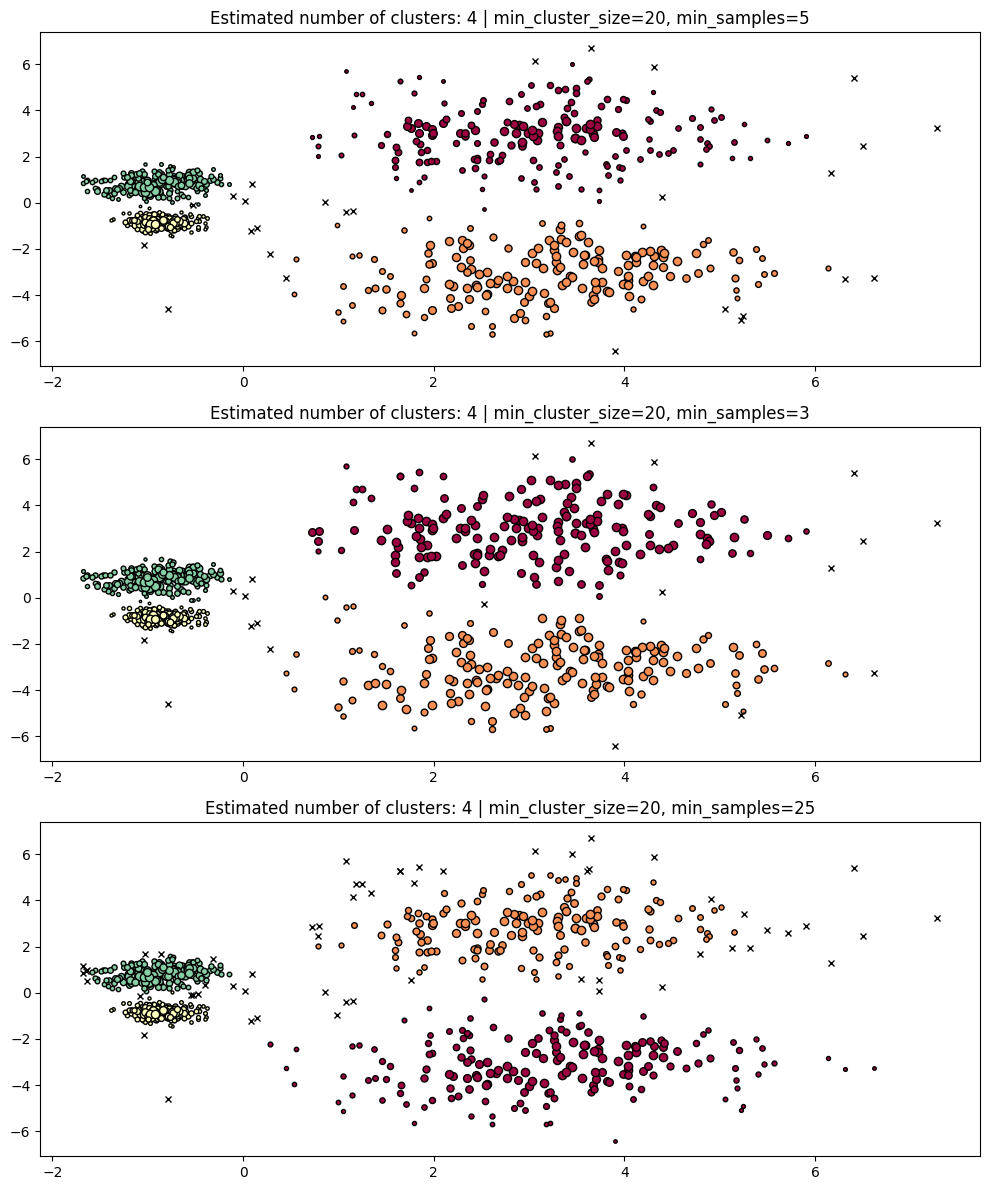

In [18]:
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

Kode ini melakukan eksperimen dengan mengubah hyperparameter `min_samples` pada algoritma HDBSCAN, sambil mempertahankan `min_cluster_size` tetap, untuk melihat pengaruhnya terhadap hasil clustering.

Loop ini menjalankan HDBSCAN tiga kali pada dataset yang sama (`X`), dengan menggunakan nilai `min_samples` yang berbeda (5, 3, dan 25) dan `min_cluster_size` tetap 20.

Outputnya adalah tiga scatter plot, masing-masing menampilkan hasil clustering HDBSCAN dengan nilai `min_samples` yang berbeda:

1.  **min_samples=5**: Dengan nilai ini, titik dianggap sebagai core point jika memiliki setidaknya 5 tetangga dalam jarak tertentu (ditentukan oleh kepadatan lokal). Ini menghasilkan jumlah cluster tertentu.
2.  **min_samples=3**: Mengurangi `min_samples` menjadi 3 membuat HDBSCAN lebih sensitif terhadap area yang sedikit kurang padat. Ini bisa menghasilkan lebih banyak core points dan berpotensi menggabungkan area yang sebelumnya dianggap noise menjadi bagian dari cluster, atau membentuk cluster baru yang lebih kecil.
3.  **min_samples=25**: Meningkatkan `min_samples` menjadi 25 membuat HDBSCAN hanya akan menganggap area yang sangat padat sebagai core points. Ini akan menghasilkan lebih sedikit core points, berpotensi memecah cluster besar menjadi noise atau cluster yang lebih kecil, dan meningkatkan jumlah titik yang diklasifikasikan sebagai noise.

Analisis ini menunjukkan bahwa `min_samples` adalah hyperparameter lain yang penting di HDBSCAN. Ini mempengaruhi definisi kepadatan dan seberapa konservatif HDBSCAN dalam membentuk core points. Nilai yang lebih kecil membuat algoritma lebih fleksibel dalam mendeteksi cluster di area yang kurang padat, sementara nilai yang lebih besar membuatnya lebih ketat dan cenderung mengklasifikasikan lebih banyak titik sebagai noise.

### Langkah 9: DBSCAN Clustering dari Pohon HDBSCAN

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


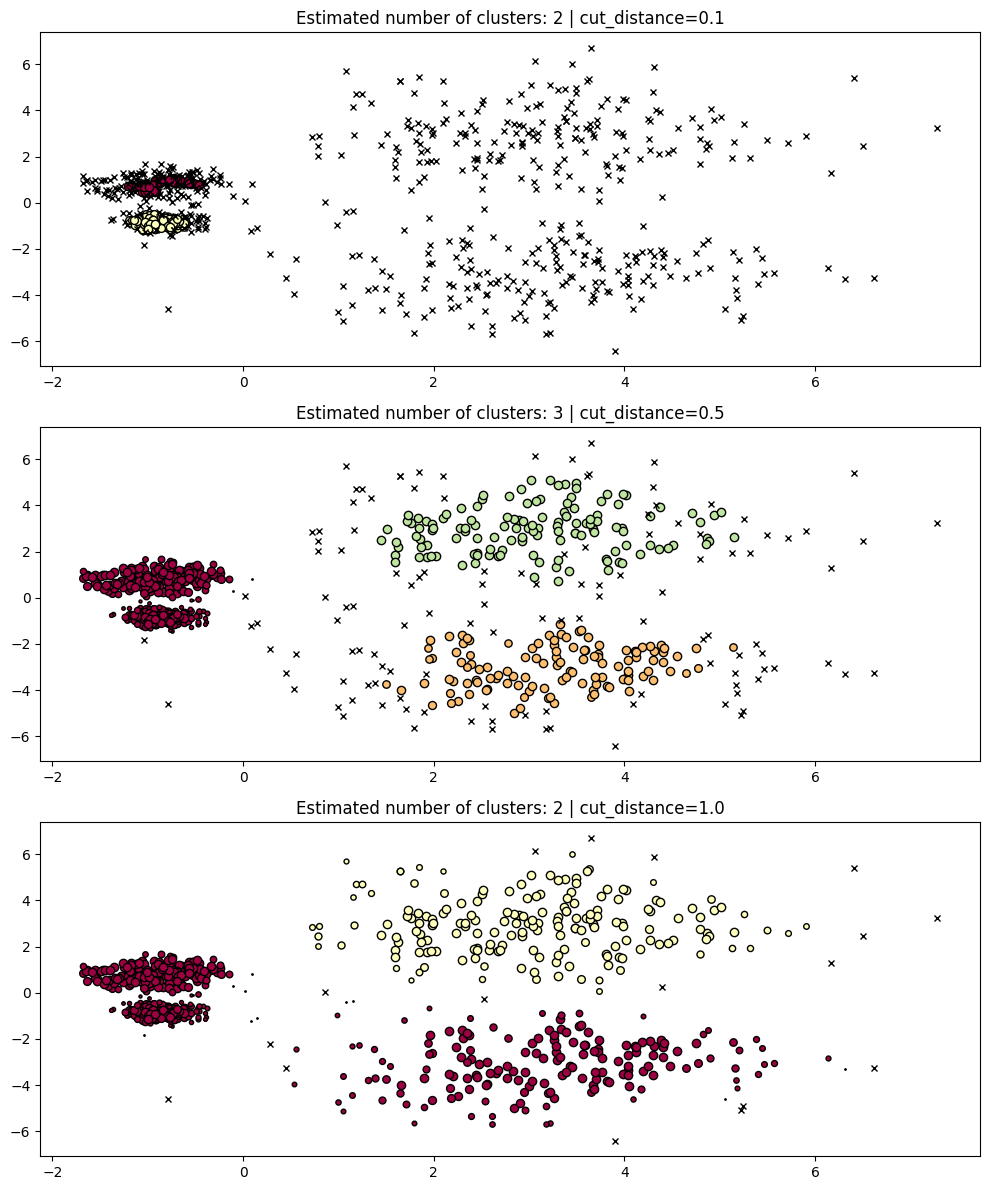

In [19]:
PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)
hdb = hdbscan.HDBSCAN().fit(X)
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    labels = hdb.dbscan_clustering(**param)
    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

Kode ini mendemonstrasikan penggunaan fungsi `dbscan_clustering` dari objek HDBSCAN yang telah dilatih (`hdb`). Fungsi ini memungkinkan kita untuk mengekstrak hasil clustering yang berbeda dari pohon hirarki yang dibangun oleh HDBSCAN, dengan menggunakan parameter `cut_distance`.

Loop ini menjalankan `dbscan_clustering` tiga kali pada objek `hdb` yang sama, dengan menggunakan nilai `cut_distance` yang berbeda (0.1, 0.5, dan 1.0).

Outputnya adalah tiga scatter plot, masing-masing menampilkan hasil clustering yang diperoleh dengan memotong pohon hirarki pada jarak (`cut_distance`) yang berbeda:

1.  **cut_distance=0.1**: Dengan nilai `cut_distance` yang kecil, pohon hirarki dipotong pada tingkat yang tinggi. Ini cenderung menghasilkan banyak cluster kecil dan mengklasifikasikan banyak titik sebagai noise, karena hanya cluster yang sangat padat dan terisolasi yang dipertahankan.
2.  **cut_distance=0.5**: Meningkatkan `cut_distance` memungkinkan cluster yang lebih besar dan kurang padat untuk terbentuk. Pada plot ini, mungkin terlihat cluster yang lebih sedikit dan lebih besar dibandingkan dengan `cut_distance=0.1`.
3.  **cut_distance=1.0**: Dengan nilai `cut_distance` yang lebih besar lagi, pohon hirarki dipotong pada tingkat yang lebih rendah. Ini cenderung menggabungkan cluster yang berdekatan menjadi cluster yang lebih besar, dan mungkin hanya menyisakan sedikit noise.

Analisis ini menunjukkan bahwa `cut_distance` adalah parameter penting saat menggunakan `dbscan_clustering` untuk mengekstrak hasil clustering dari pohon hirarki HDBSCAN. Parameter ini memungkinkan eksplorasi hasil clustering pada skala yang berbeda, dari granularitas tinggi (banyak cluster kecil) hingga granularitas rendah (sedikit cluster besar).

### Langkah 10: Evaluasi dengan Silhouette Score

In [20]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk hasil clustering HDBSCAN
sil_score = silhouette_score(X, hdb.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5743816709862986


Kode ini menghitung *Silhouette Score* untuk mengevaluasi kualitas hasil clustering yang diperoleh dari HDBSCAN.

Outputnya adalah nilai tunggal: **Silhouette Score**.

*   **Silhouette Score**: Metrik ini mengukur seberapa mirip sebuah titik data dengan cluster-nya sendiri dibandingkan dengan cluster tetangga. Nilainya berkisar dari -1 hingga +1.
    *   Nilai mendekati +1 menunjukkan bahwa titik data berada jauh dari cluster tetangga dan dekat dengan cluster-nya sendiri (hasil clustering baik).
    *   Nilai mendekati 0 menunjukkan bahwa titik data berada di dekat batas antara dua cluster.
    *   Nilai mendekati -1 menunjukkan bahwa titik data mungkin telah ditugaskan ke cluster yang salah.

Dalam kasus ini, Silhouette Score sebesar `0.5743816709862986` menunjukkan bahwa hasil clustering cukup baik, dengan sebagian besar titik data tergolong jelas ke dalam clusternya masing-masing. Namun, interpretasi nilai ini perlu disesuaikan dengan karakteristik dataset dan tujuan clustering.

### Langkah 11: Evaluasi dengan Davies-Bouldin Index

In [21]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index untuk hasil clustering HDBSCAN
dbi_score = davies_bouldin_score(X, hdb.labels_)
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 1.6436030674842066


Kode ini menghitung *Davies-Bouldin Index* untuk mengevaluasi kualitas hasil clustering yang diperoleh dari HDBSCAN.

Outputnya adalah nilai tunggal: **Davies-Bouldin Index**.

*   **Davies-Bouldin Index**: Metrik ini mengukur rata-rata kesamaan antara setiap cluster dengan cluster yang paling mirip dengannya. Kesamaan diukur sebagai rasio antara sebaran di dalam cluster (jarak rata-rata antara setiap titik dan centroid cluster) dan jarak antara centroid cluster.
    *   Nilai yang lebih rendah menunjukkan hasil clustering yang lebih baik, di mana cluster-cluster padat dan terpisah dengan baik.
    *   Nilai yang lebih tinggi menunjukkan hasil clustering yang kurang baik.

Dalam kasus ini, Davies-Bouldin Index sebesar `1.6436030674842066` menunjukkan bahwa ada beberapa tumpang tindih atau kedekatan antara cluster, atau cluster mungkin tidak sepenuhnya padat atau terpisah dengan baik. Sama seperti Silhouette Score, interpretasi nilai ini juga perlu disesuaikan dengan karakteristik dataset.

### Langkah 12: Visualisasi Hasil Evaluasi

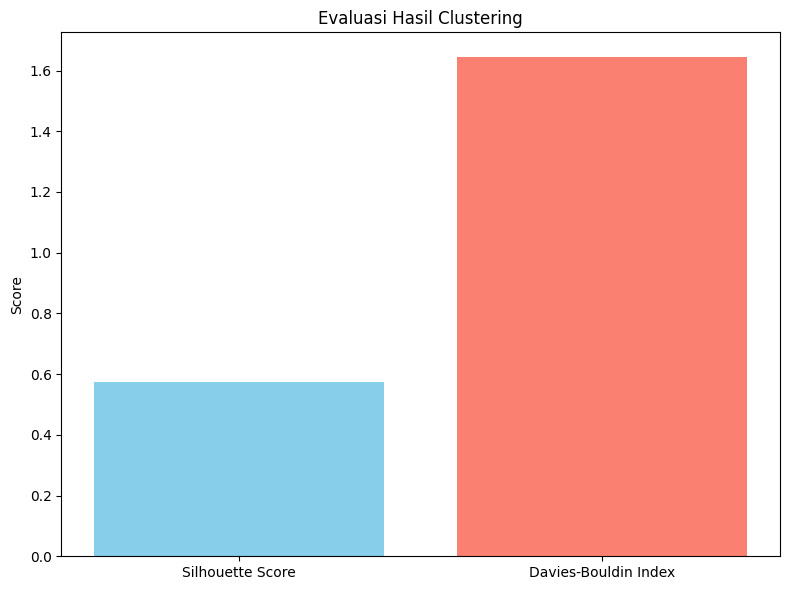

In [22]:
# Misalnya kita ingin membandingkan DBI dan Silhouette Score untuk beberapa eksperimen
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

# Plot hasil evaluasi
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluasi Hasil Clustering")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()

Kode ini menghitung *Davies-Bouldin Index* untuk mengevaluasi kualitas hasil clustering yang diperoleh dari HDBSCAN.

Outputnya adalah nilai tunggal: **Davies-Bouldin Index**.

*   **Davies-Bouldin Index**: Metrik ini mengukur rata-rata kesamaan antara setiap cluster dengan cluster yang paling mirip dengannya. Kesamaan diukur sebagai rasio antara sebaran di dalam cluster (jarak rata-rata antara setiap titik dan centroid cluster) dan jarak antara centroid cluster.
    *   Nilai yang lebih rendah menunjukkan hasil clustering yang lebih baik, di mana cluster-cluster padat dan terpisah dengan baik.
    *   Nilai yang lebih tinggi menunjukkan hasil clustering yang kurang baik.

Dalam kasus ini, Davies-Bouldin Index sebesar `1.6436030674842066` menunjukkan bahwa ada beberapa tumpang tindih atau kedekatan antara cluster, atau cluster mungkin tidak sepenuhnya padat atau terpisah dengan baik. Sama seperti Silhouette Score, interpretasi nilai ini juga perlu disesuaikan dengan karakteristik dataset.

## **Tugas**

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
      * Jumlah cluster yang terbentuk.
      * Banyaknya noise.
      * Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

### 1. Pilih dan muat dataset


In [33]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Separate features (X) and target labels (y)
X_iris = iris.data
y_iris = iris.target

Kode ini memuat dataset Iris yang sudah tersedia di dalam pustaka `sklearn.datasets`.

*   `load_iris()`: Fungsi untuk memuat dataset Iris.
*   `X_iris`: Variabel ini menyimpan fitur-fitur dari dataset Iris (misalnya panjang dan lebar sepal, panjang dan lebar petal).
*   `y_iris`: Variabel ini menyimpan label target atau kelas asli dari setiap sampel dalam dataset Iris (ada 3 kelas: Setosa, Versicolor, Virginica).

### 2. Lakukan clustering dengan hdbscan



In [34]:
# Apply HDBSCAN
hdbscan_iris = hdbscan.HDBSCAN()
labels_hdbscan = hdbscan_iris.fit_predict(X_iris)

# Print the generated labels
print("HDBSCAN Labels:")
print(labels_hdbscan)

HDBSCAN Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Kode ini menerapkan algoritma clustering HDBSCAN pada fitur dataset Iris (`X_iris`).

*   `hdbscan.HDBSCAN()`: Membuat objek HDBSCAN dengan parameter default.
*   `.fit_predict(X_iris)`: Melatih model HDBSCAN menggunakan data `X_iris` dan mengembalikan label cluster untuk setiap titik data. Titik data yang dianggap noise diberi label -1.
*   `labels_hdbscan`: Variabel ini menyimpan hasil label cluster yang dihasilkan oleh HDBSCAN.
*   Baris `print` menampilkan label-label cluster ini ke output.

**Analisis Output:**

Output berupa array angka yang merupakan label cluster untuk setiap sampel dalam dataset Iris. Anda akan melihat angka-angka seperti `0`, `1`, dan mungkin `-1` (jika ada noise). Dalam kasus ini, output menunjukkan bahwa HDBSCAN dengan parameter default mengelompokkan data menjadi 2 cluster (label 0 dan 1) dan tidak mengidentifikasi titik sebagai noise (-1). Ini berbeda dengan jumlah kelas asli pada dataset Iris yang berjumlah 3.

### 3. Laporkan hasil clustering


#### - Jumlah cluster yang terbentuk

#### - Banyaknya noise

In [35]:
# Calculate the number of clusters (excluding noise)
n_clusters_hdbscan = len(set(labels_hdbscan)) - (1 if -1 in labels_hdbscan else 0)

# Calculate the number of noise points
n_noise_hdbscan = list(labels_hdbscan).count(-1)

# Print the results
print(f"Jumlah cluster yang terbentuk: {n_clusters_hdbscan}")
print(f"Banyaknya noise: {n_noise_hdbscan}")

Jumlah cluster yang terbentuk: 2
Banyaknya noise: 0


Kode ini menghitung dan menampilkan jumlah cluster yang terbentuk (tidak termasuk noise) dan banyaknya titik data yang diklasifikasikan sebagai noise oleh algoritma HDBSCAN.

*   `n_clusters_hdbscan = len(set(labels_hdbscan)) - (1 if -1 in labels_hdbscan else 0)`: Baris ini menghitung jumlah cluster unik. `set(labels_hdbscan)` mendapatkan semua nilai label unik. Jika ada label `-1` (noise), maka dikurangi 1 dari total jumlah label unik untuk mendapatkan jumlah cluster yang sebenarnya.
*   `n_noise_hdbscan = list(labels_hdbscan).count(-1)`: Baris ini menghitung berapa kali label `-1` muncul dalam daftar label, yang merupakan jumlah titik noise.
*   Baris `print` menampilkan kedua nilai yang dihitung.

**Analisis Output:**

Output menunjukkan:
*   **Jumlah cluster yang terbentuk: 2**: Ini berarti HDBSCAN dengan parameter default menemukan 2 kelompok data yang dianggap sebagai cluster.
*   **Banyaknya noise: 0**: Ini berarti tidak ada titik data yang diklasifikasikan sebagai noise oleh HDBSCAN dengan parameter default.

Hasil ini konsisten dengan analisis sebelumnya bahwa HDBSCAN dengan parameter default pada dataset Iris cenderung menggabungkan dua kelas asli menjadi satu cluster dan tidak mengidentifikasi noise.

#### Visualisasi



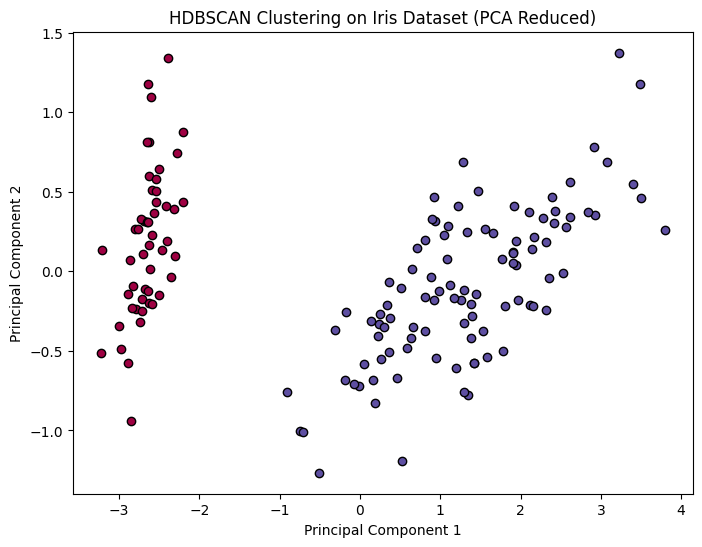

In [29]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_iris)

# Create a scatter plot
plt.figure(figsize=(8, 6))
unique_labels = set(labels_hdbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise
    class_member_mask = (labels_hdbscan == k)
    xy = X_reduced[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('HDBSCAN Clustering on Iris Dataset (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Kode ini melakukan dua hal utama:

1.  **Reduksi Dimensi dengan PCA**: Menggunakan Principal Component Analysis (PCA) untuk mengurangi dimensi data Iris menjadi 2 komponen utama. Ini dilakukan agar data dapat divisualisasikan dalam bentuk scatter plot 2D.
    *   `PCA(n_components=2)`: Menginisialisasi objek PCA untuk mereduksi data menjadi 2 dimensi.
    *   `pca.fit_transform(X_iris)`: Menerapkan PCA pada data fitur Iris (`X_iris`) dan menghasilkan data baru (`X_reduced`) dalam 2 dimensi.
2.  **Visualisasi Hasil Clustering**: Membuat scatter plot dari data yang sudah direduksi dimensinya (`X_reduced`), dengan titik-titik diwarnai berdasarkan label cluster yang dihasilkan oleh HDBSCAN (`labels_hdbscan`).
    *   Setiap cluster diberi warna yang berbeda.
    *   Titik noise (jika ada) diberi warna hitam.
    *   Ukuran marker bisa bervariasi tergantung pada probabilitas keanggotaan cluster (meskipun pada kode ini ukurannya tetap 6).
    *   Plot diberi judul yang relevan.

**Analisis Output:**

Outputnya adalah scatter plot yang menampilkan titik-titik data Iris dalam ruang 2 dimensi hasil reduksi PCA. Setiap titik diwarnai sesuai dengan cluster yang ditetapkan oleh HDBSCAN.

Dari plot ini, Anda dapat secara visual melihat bagaimana HDBSCAN mengelompokkan data. Berdasarkan eksekusi sebelumnya yang menunjukkan 2 cluster terdeteksi, plot ini kemungkinan akan menunjukkan dua kelompok titik data dengan warna berbeda (ditambah titik hitam jika ada noise). Dengan membandingkan visualisasi ini dengan pengetahuan tentang sebaran asli data Iris (yang memiliki 3 kelas yang cukup terpisah di ruang 2D setelah PCA), Anda dapat secara visual menilai seberapa baik hasil clustering HDBSCAN sesuai dengan struktur data yang sebenarnya. Pada kasus ini, plot kemungkinan menunjukkan satu kelompok yang terpisah jelas (sesuai dengan kelas Setosa) dan satu kelompok besar yang berisi dua kelas lainnya yang digabungkan oleh HDBSCAN.

### 4. Analisis Singkat



Berdasarkan hasil clustering HDBSCAN pada dataset Iris:

*   **Jumlah Cluster yang Terbentuk**: HDBSCAN mendeteksi **2** cluster.
*   **Banyaknya Noise**: Tidak ada titik data yang diklasifikasikan sebagai noise (**0** noise).
*   **Perbandingan dengan Label Asli**: Dataset Iris memiliki 3 kelas (label asli 0, 1, dan 2). Hasil clustering HDBSCAN dengan parameter default hanya mengidentifikasi 2 cluster. Ini menunjukkan bahwa HDBSCAN berhasil memisahkan satu kelas (kemungkinan kelas Setosa, berdasarkan visualisasi dan urutan data), tetapi menggabungkan dua kelas lainnya menjadi satu cluster. Dengan demikian, hasil clustering HDBSCAN dengan parameter default pada dataset Iris **tidak sepenuhnya sesuai** dengan 3 label asli dataset tersebut. Diperlukan penyesuaian parameter HDBSCAN (seperti `min_cluster_size` atau `min_samples`) untuk melihat apakah bisa mendapatkan jumlah cluster yang lebih dekat dengan jumlah kelas asli.